In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [2]:
# Load data
data = pd.read_csv("customer.csv")
print("Shape:", data.shape)
data.head()



Shape: (8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Basic info
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
 11  Cluster          6665 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 650.9+ KB
None
                 ID          Age  Work_Experience  Family_Size      Cluster
count    6665.00000  6665.000000      6665.000000  6665.000000  6665.000000
mean   463519.84096    

In [5]:
# Handle missing values
data = data.dropna()  



In [6]:
# Select numeric columns for clustering
numeric_data = data.select_dtypes(include=['int64', 'float64'])

if 'CustomerID' in numeric_data.columns:
    numeric_data = numeric_data.drop('CustomerID', axis=1)



In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)



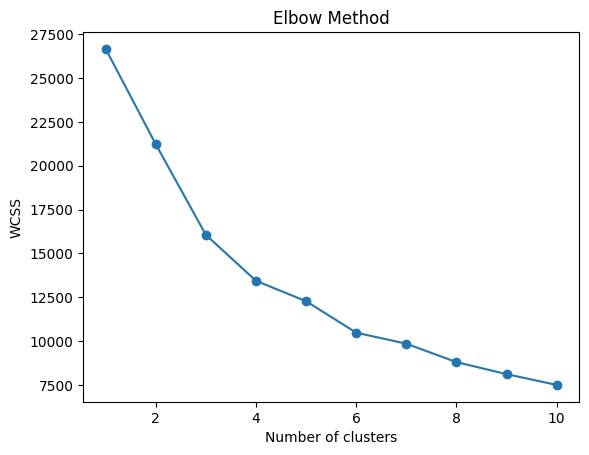

In [8]:
# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



In [10]:
# Apply KMeans (choose cluster number based on elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters



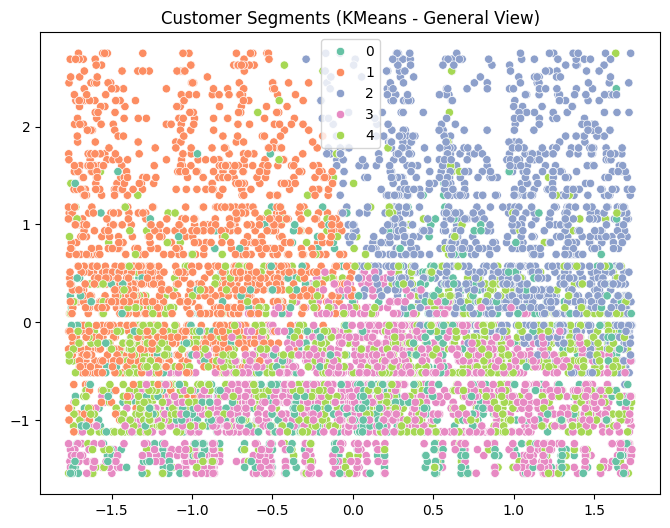

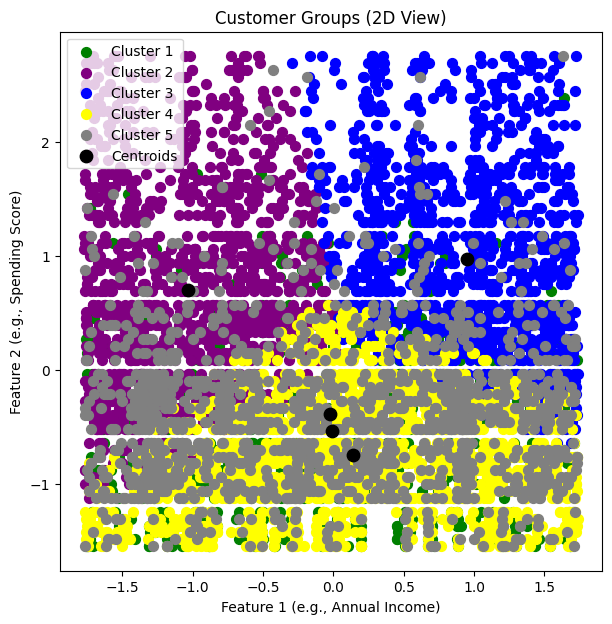

In [11]:
# Visualize clusters (general scatter using first 2 features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=clusters, palette="Set2")
plt.title("Customer Segments (KMeans - General View)")
plt.show()


X = scaled_data[:, :2]  
Y = clusters

plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='purple', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='grey', label='Cluster 5')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=80, c='black', label='Centroids')
plt.title("Customer Groups (2D View)")
plt.xlabel("Feature 1 (e.g., Annual Income)")
plt.ylabel("Feature 2 (e.g., Spending Score)")
plt.legend()
plt.show()



Cluster Summary (Numeric Features):
                    ID        Age  Work_Experience  Family_Size
Cluster                                                        
0        463490.547145  34.717131         1.771580     5.810093
1        460864.112994  55.055085         1.151836     2.157486
2        465948.217920  59.668945         0.965831     2.195140
3        463887.192329  31.248471         0.911062     2.928293
4        463464.428986  37.150725         8.439855     2.425362

Number of customers per cluster:
Cluster
3    1799
1    1416
4    1380
2    1317
0     753
Name: count, dtype: int64


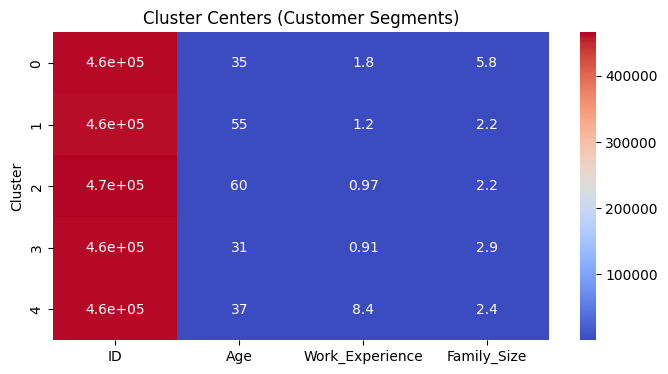


Value counts for 'Gender' by cluster:
Cluster  Gender
0        Male      0.551129
         Female    0.448871
1        Male      0.549435
         Female    0.450565
2        Male      0.571754
         Female    0.428246
3        Male      0.581434
         Female    0.418566
4        Female    0.503623
         Male      0.496377
Name: proportion, dtype: float64

Value counts for 'Ever_Married' by cluster:
Cluster  Ever_Married
0        No              0.576361
         Yes             0.423639
1        Yes             0.780367
         No              0.219633
2        Yes             0.849658
         No              0.150342
3        No              0.610895
         Yes             0.389105
4        Yes             0.507971
         No              0.492029
Name: proportion, dtype: float64

Value counts for 'Graduated' by cluster:
Cluster  Graduated
0        No           0.584329
         Yes          0.415671
1        Yes          0.774011
         No           0.225989
2      

In [12]:
# Analyze cluster characteristics
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
cluster_summary = data.groupby('Cluster')[numeric_cols].mean()

print("Cluster Summary (Numeric Features):")
print(cluster_summary)

print("\nNumber of customers per cluster:")
print(data['Cluster'].value_counts())

# Visualize cluster centers (heatmap)
plt.figure(figsize=(8,4))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Cluster Centers (Customer Segments)")
plt.show()

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}' by cluster:")
    print(data.groupby('Cluster')[col].value_counts(normalize=True))
